# Case - Online Order Fulfillment Center:
1. Compute the empirical PMF of the number of packing errors per batch.
2. Plot the empirical PMF using a bar chart (you may use Python, Excel, or draw manually).
3. What is the estimated probability that a randomly selected batch has 2 packing errors? Interpret
this result in the context of quality control.(Hint: use the empirical mean)
4. You suspect that the number of packing errors follows a Binomial distribution with number of trials
n = 5 (since each batch has 5 items
Estimate the unknown parameter ˆp(probability of an item being packed incorrectly).
Justify your modeling choice and compare the empirical PMF with the theoretical Binomial distribution
using the estimated ˆp.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

#Q1
x = np.array([0,1,2,3,4,5])
f = np.array([240,190,110,40,15,5])
N = f.sum() #number of batches

#pmf
empirical_pmf = f/N
empirical_pmf

array([0.4       , 0.31666667, 0.18333333, 0.06666667, 0.025     ,
       0.00833333])

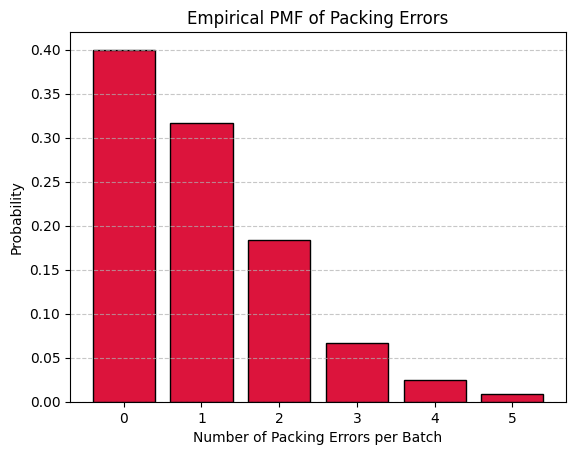

In [ ]:
#Q2

plt.bar(x, empirical_pmf, color='crimson', edgecolor='black')
plt.title('Empirical PMF of Packing Errors')
plt.xlabel('Number of Packing Errors per Batch')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(x)
plt.show()


In [ ]:
#Q3

p_x2 = empirical_pmf[2]
print(f"Estimated P (x =2): {p_x2:4f} =>  {p_x2*100:.2f}% chance")



Estimated P (x =2): 0.183333 =>  18.33% chance


In [ ]:
#Q4

empirical_mean = np.sum(x*empirical_pmf)
p_hat = empirical_mean/5 # because n = 5
print(f"Empirical Mean: {empirical_mean:.3f}")
print(f"Estimated p (probability of a packing error): {p_hat:3f}")

Empirical Mean: 1.025
Estimated p (probability of a packing error): 0.205000


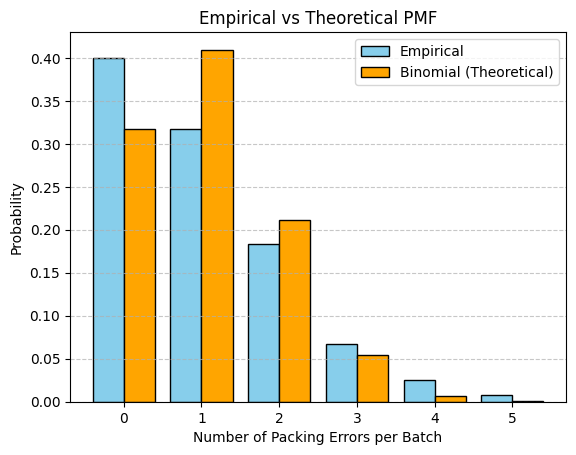

In [ ]:
# Comparing with Binomial distribution
from scipy.stats import binom

n = 5
theoretical_pmf = binom.pmf(x, n, p_hat)
plt.bar(x - 0.2, empirical_pmf, width=0.4, label='Empirical', color='skyblue', edgecolor='black')
plt.bar(x + 0.2, theoretical_pmf, width=0.4, label='Binomial (Theoretical)', color='orange', edgecolor='black')
plt.title('Empirical vs Theoretical PMF')
plt.xlabel('Number of Packing Errors per Batch')
plt.ylabel('Probability')
plt.xticks(x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()